# 基于爬虫的疫情数据可视化分析及其中数学规律的简单探讨——课程设计

王兴睿<p>
2019211121班<p>
2018211756<p>
上交时间：2020.6.21<p>

# 目录
1. [一、国外疫情地图](#paragraph1)
2. [二、中国疫情地图](#paragraph2)
3. [三、国内、国外数据图表](#paragraph3)
4. [四、绘制死亡人数与确诊人数散点图——国内与国外（简单分类） ](#paragraph4)
5. [五、绘制国外疫情较为严重的国家每日确诊、新增确诊和死亡人数曲线图](#paragraph5)
6. [六、尝试挖掘疫情中的数学规律](#paragraph6)

### 一、国外疫情地图<a name="paragraph1"></a>

In [1]:
import json
import jsonpath
import requests
import time
import datetime
import pandas as pd
from pyecharts.charts import Map,Geo
from pyecharts import options as opts
from pyecharts.globals import GeoType,RenderType

In [2]:
url_total = 'https://api.inews.qq.com/newsqa/v1/automation/modules/list?modules=FAutoGlobalStatis,FAutoContinentStatis,FAutoGlobalDailyList,FAutoCountryConfirmAdd'
# 2.请求资源，获取响应内容
resp_total = requests.post(url_total)

# 3.提取数据
# 类型转换 json--->dict
data_total = json.loads(resp_total.text)
#print(data_total)

In [3]:
GlobalStatis = jsonpath.jsonpath(data_total,"$..FAutoGlobalStatis")
GlobalNowConfirm = GlobalStatis[0]['nowConfirm']
GlobalConfirm = GlobalStatis[0]['confirm']
GlobalHeal = GlobalStatis[0]['heal']
GlobalDead = GlobalStatis[0]['dead']
GlobalNowConfirmAdd = GlobalStatis[0]['nowConfirmAdd']
GlobalConfirmAdd = GlobalStatis[0]['confirmAdd']
GlobalHealAdd = GlobalStatis[0]['healAdd']
GlobalDeadAdd = GlobalStatis[0]['deadAdd']
LastUpdateTime = GlobalStatis[0]['lastUpdateTime']
GlobalData = {'name':['GlobalNowConfirm','GlobalConfirm','GlobalHeal','GlobalDead','GlobalNowConfirmAdd',
                    'GlobalConfirmAdd','GlobalHealAdd','GlobalDeadAdd','LastUpdateTime'],
             'values':[GlobalNowConfirm,GlobalConfirm,GlobalHeal,GlobalDead,GlobalNowConfirmAdd,GlobalConfirmAdd,GlobalHealAdd,GlobalDeadAdd,LastUpdateTime]}
GlobalDataFrame = pd.DataFrame(GlobalData,index=None,
               columns=['name','values'])
GlobalDataFrame

,name,values
0,GlobalNowConfirm,3680732
1,GlobalConfirm,8789742
2,GlobalHeal,4648157
3,GlobalDead,460853
4,GlobalNowConfirmAdd,1396
5,GlobalConfirmAdd,59901
6,GlobalHealAdd,55958
7,GlobalDeadAdd,2547
8,LastUpdateTime,2020-06-21 08:45:38


为了能比较直观地观察国外及国内的疫情情况，首先绘制出疫情地图，从而在整体上对疫情有把握。<p>第一步绘制国外疫情地图

制作疫情地图时，使用了pyecharts。<p>pyecharts是一款将python与echarts结合的强大的数据可视化工具。

首先，从腾讯新闻上爬取实时的国外疫情数据

In [4]:
# 1.目标网址
url = 'https://api.inews.qq.com/newsqa/v1/automation/foreign/country/ranklist'

# 2.请求资源，获取响应内容
resp = requests.post(url)
#print(resp.text)

# 3.提取数据
# 类型转换 json--->dict
data = json.loads(resp.text)
#print(data)

下面从爬取到的数据中取出:<p>1.国家名称<p>2.确诊、死亡、治愈总人数<p>3.当前各个国家确诊人数<p>4.确诊、死亡新增人数

In [5]:
#print(data['data'][0]['name'])
#获取国外国家名称
name = jsonpath.jsonpath(data,"$..name") 
#获取国外每个国家确诊总人数
confirm = jsonpath.jsonpath(data,"$..confirm")
#获取国外每个国家死亡总人数
dead = jsonpath.jsonpath(data,"$..dead")
#获取国外每个国家治愈总人数
heal = jsonpath.jsonpath(data,"$..heal")
#获取国外每个国家当前确诊人数
nowConfirm = jsonpath.jsonpath(data,"$..nowConfirm")
#获取国外每个国家确诊新增人数
confirmAdd = jsonpath.jsonpath(data,"$..confirmAdd")
#获取国外每个国家死亡新增人数
deadCompare = jsonpath.jsonpath(data,"$..deadCompare")

用爬取到的数据绘制出国外疫情地图

In [6]:
# 数据处理
data_list = zip(name,nowConfirm)
#print(list(data_list))

# 4.数据可视化        matplotlib 和 pyecharts
nameMap = {
    'Singapore Rep.': '新加坡',
    'Dominican Rep.': '多米尼加',
    'Palestine': '巴勒斯坦',
    'Bahamas': '巴哈马',
    'Timor-Leste': '东帝汶',
    'Afghanistan': '阿富汗',
    'Guinea-Bissau': '几内亚比绍',
    "Côte d'Ivoire": '科特迪瓦',
    'Siachen Glacier': '锡亚琴冰川',
    "Br. Indian Ocean Ter.": '英属印度洋领土',
    'Angola': '安哥拉',
    'Albania': '阿尔巴尼亚',
    'United Arab Emirates': '阿联酋',
    'Argentina': '阿根廷',
    'Armenia': '亚美尼亚',
    'French Southern and Antarctic Lands': '法属南半球和南极领地',
    'Australia': '澳大利亚',
    'Austria': '奥地利',
    'Azerbaijan': '阿塞拜疆',
    'Burundi': '布隆迪',
    'Belgium': '比利时',
    'Benin': '贝宁',
    'Burkina Faso': '布基纳法索',
    'Bangladesh': '孟加拉国',
    'Bulgaria': '保加利亚',
    'The Bahamas': '巴哈马',
    'Bosnia and Herz.': '波斯尼亚和黑塞哥维那',
    'Belarus': '白俄罗斯',
    'Belize': '伯利兹',
    'Bermuda': '百慕大',
    'Bolivia': '玻利维亚',
    'Brazil': '巴西',
    'Brunei': '文莱',
    'Bhutan': '不丹',
    'Botswana': '博茨瓦纳',
    'Central African Rep.': '中非共和国',
    'Canada': '加拿大',
    'Switzerland': '瑞士',
    'Chile': '智利',
    'China': '中国',
    'Ivory Coast': '象牙海岸',
    'Cameroon': '喀麦隆',
    'Dem. Rep. Congo': '刚果（金）',
    'Congo': '刚果（布）',
    'Colombia': '哥伦比亚',
    'Costa Rica': '哥斯达黎加',
    'Cuba': '古巴',
    'N. Cyprus': '北塞浦路斯',
    'Cyprus': '塞浦路斯',
    'Czech Rep.': '捷克',
    'Germany': '德国',
    'Djibouti': '吉布提',
    'Denmark': '丹麦',
    'Algeria': '阿尔及利亚',
    'Ecuador': '厄瓜多尔',
    'Egypt': '埃及',
    'Eritrea': '厄立特里亚',
    'Spain': '西班牙',
    'Estonia': '爱沙尼亚',
    'Ethiopia': '埃塞俄比亚',
    'Finland': '芬兰',
    'Fiji': '斐',
    'Falkland Islands': '福克兰群岛',
    'France': '法国',
    'Gabon': '加蓬',
    'United Kingdom': '英国',
    'Georgia': '格鲁吉亚',
    'Ghana': '加纳',
    'Guinea': '几内亚',
    'Gambia': '冈比亚',
    'Guinea Bissau': '几内亚比绍',
    'Eq. Guinea': '赤道几内亚',
    'Greece': '希腊',
    'Greenland': '格陵兰',
    'Guatemala': '危地马拉',
    'French Guiana': '法属圭亚那',
    'Guyana': '圭亚那',
    'Honduras': '洪都拉斯',
    'Croatia': '克罗地亚',
    'Haiti': '海地',
    'Hungary': '匈牙利',
    'Indonesia': '印度尼西亚',
    'India': '印度',
    'Ireland': '爱尔兰',
    'Iran': '伊朗',
    'Iraq': '伊拉克',
    'Iceland': '冰岛',
    'Israel': '以色列',
    'Italy': '意大利',
    'Jamaica': '牙买加',
    'Jordan': '约旦',
    'Japan': '日本',
    'Japan': '日本本土',
    'Kazakhstan': '哈萨克斯坦',
    'Kenya': '肯尼亚',
    'Kyrgyzstan': '吉尔吉斯斯坦',
    'Cambodia': '柬埔寨',
    'Korea': '韩国',
    'Kosovo': '科索沃',
    'Kuwait': '科威特',
    'Lao PDR': '老挝',
    'Lebanon': '黎巴嫩',
    'Liberia': '利比里亚',
    'Libya': '利比亚',
    'Sri Lanka': '斯里兰卡',
    'Lesotho': '莱索托',
    'Lithuania': '立陶宛',
    'Luxembourg': '卢森堡',
    'Latvia': '拉脱维亚',
    'Morocco': '摩洛哥',
    'Moldova': '摩尔多瓦',
    'Madagascar': '马达加斯加',
    'Mexico': '墨西哥',
    'Macedonia': '马其顿',
    'Mali': '马里',
    'Myanmar': '缅甸',
    'Montenegro': '黑山',
    'Mongolia': '蒙古',
    'Mozambique': '莫桑比克',
    'Mauritania': '毛里塔尼亚',
    'Malawi': '马拉维',
    'Malaysia': '马来西亚',
    'Namibia': '纳米比亚',
    'New Caledonia': '新喀里多尼亚',
    'Niger': '尼日尔',
    'Nigeria': '尼日利亚',
    'Nicaragua': '尼加拉瓜',
    'Netherlands': '荷兰',
    'Norway': '挪威',
    'Nepal': '尼泊尔',
    'New Zealand': '新西兰',
    'Oman': '阿曼',
    'Pakistan': '巴基斯坦',
    'Panama': '巴拿马',
    'Peru': '秘鲁',
    'Philippines': '菲律宾',
    'Papua New Guinea': '巴布亚新几内亚',
    'Poland': '波兰',
    'Puerto Rico': '波多黎各',
    'Dem. Rep. Korea': '朝鲜',
    'Portugal': '葡萄牙',
    'Paraguay': '巴拉圭',
    'Qatar': '卡塔尔',
    'Romania': '罗马尼亚',
    'Russia': '俄罗斯',
    'Rwanda': '卢旺达',
    'W. Sahara': '西撒哈拉',
    'Saudi Arabia': '沙特阿拉伯',
    'Sudan': '苏丹',
    'S. Sudan': '南苏丹',
    'Senegal': '塞内加尔',
    'Solomon Is.': '所罗门群岛',
    'Sierra Leone': '塞拉利昂',
    'El Salvador': '萨尔瓦多',
    'Somaliland': '索马里兰',
    'Somalia': '索马里',
    'Serbia': '塞尔维亚',
    'Suriname': '苏里南',
    'Slovakia': '斯洛伐克',
    'Slovenia': '斯洛文尼亚',
    'Sweden': '瑞典',
    'Swaziland': '斯威士兰',
    'Syria': '叙利亚',
    'Chad': '乍得',
    'Togo': '多哥',
    'Thailand': '泰国',
    'Tajikistan': '塔吉克斯坦',
    'Turkmenistan': '土库曼斯坦',
    'East Timor': '东帝汶',
    'Trinidad and Tobago': '特里尼达和多巴哥',
    'Tunisia': '突尼斯',
    'Turkey': '土耳其',
    'Tanzania': '坦桑尼亚',
    'Uganda': '乌干达',
    'Ukraine': '乌克兰',
    'Uruguay': '乌拉圭',
    'United States': '美国',
    'Uzbekistan': '乌兹别克斯坦',
    'Venezuela': '委内瑞拉',
    'Vietnam': '越南',
    'Vanuatu': '瓦努阿图',
    'West Bank': '西岸',
    'Yemen': '也门',
    'South Africa': '南非',
    'Zambia': '赞比亚',
    'Zimbabwe': '津巴布韦'
}
map = Map().add(series_name = "国外疫情地图",
                data_pair = data_list, #输入数据
               maptype = 'world',
                name_map = nameMap, #添加映射
               is_map_symbol_show = False,
                
               )
# 设置系列配置项,不显示国家名称
map.set_series_opts(label_opts = opts.LabelOpts(is_show = False))
map.set_global_opts(title_opts = opts.TitleOpts(title = '国外疫情情况'), #设置图标题
                    toolbox_opts = opts.ToolboxOpts(), #显示工具箱
                   visualmap_opts = opts.VisualMapOpts(max_ = 1500000,is_piecewise = True)) #显示图例
map.render_notebook()

下面绘制出中国疫情地图:

### 二、中国疫情地图<a name="paragraph2"></a>

首先，从腾讯新闻上爬取实时的中国疫情数据

In [7]:
url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
data = json.loads(requests.get(url=url).json()['data'])
num = data['areaTree'][0]['children']
#print(num)

从爬取到的数据里面提取出:<p>1.中国各个地区确诊总人数<p>2.中国各个地区死亡总人数<p>3.中国各个地区当前确诊人数<p>4.中国各个地区新增确诊人数<p>5.中国各个地区新增死亡人数

In [8]:
#中国各个地区确诊总人数

total_data = {}
for item in num:
    if item['name'] not in total_data:
        total_data.update({item['name']:0})
    for city_data in item['children']:
        total_data[item['name']] +=int(city_data['total']['confirm'])  
#print(total_data)

In [9]:
#中国各个地区死亡总人数

total_dead_data = {}
for item in num:
    if item['name'] not in total_dead_data:
        total_dead_data.update({item['name']:0})
    for city_data in item['children']:
        total_dead_data[item['name']] +=int(city_data['total']['dead'])  
#print(total_dead_data)

In [10]:
#中国各个地区当前确诊人数

total_data_nowConfirm = {}
for item in num:
    if item['name'] not in total_data_nowConfirm:
        total_data_nowConfirm.update({item['name']:0})
    for city_data in item['children']:
        total_data_nowConfirm[item['name']] +=int(city_data['total']['nowConfirm'])  
#print(total_data_nowConfirm)

In [11]:
#中国各个地区新增确诊人数

total_new_data = {}
for item in num:
    if item['name'] not in total_new_data:
        total_new_data.update({item['name']:0})
    for city_data in item['children']:
        total_new_data[item['name']] +=int(city_data['today']['confirm'])
#print(total_new_data)

In [12]:
#中国各个地区新增确诊人数

new_dead_data = {}
for item in num:
    if item['name'] not in new_dead_data:
        new_dead_data.update({item['name']:0})
    for city_data in item['children']:
        new_dead_data[item['name']] +=int(city_data['today']['confirmCuts'])
#print(new_dead_data)

用爬取到的数据绘制国内疫情地图

In [13]:
data_list_china = list(total_data_nowConfirm.items())
print(data_list_china)

[('北京', 216), ('香港', 46), ('上海', 23), ('四川', 16), ('河北', 13), ('广东', 13), ('甘肃', 12), ('台湾', 5), ('陕西', 5), ('福建', 4), ('辽宁', 4), ('重庆', 3), ('天津', 3), ('海南', 2), ('内蒙古', 2), ('浙江', 1), ('贵州', 0), ('湖北', 0), ('吉林', 0), ('新疆', 0), ('山西', 0), ('澳门', 0), ('青海', 0), ('云南', 0), ('江苏', 0), ('安徽', 0), ('河南', 0), ('江西', 0), ('广西', 0), ('湖南', 0), ('宁夏', 0), ('西藏', 0), ('山东', 0), ('黑龙江', 0)]


In [51]:
map_china = Map().add(series_name = "中国疫情地图",
                data_pair = data_list_china, #输入数据
               maptype = 'china',
               is_map_symbol_show = False, 
               )
# 设置系列配置项,不显示城市名称
map_china.set_series_opts(label_opts = opts.LabelOpts(is_show = False))
map_china.set_global_opts(title_opts = opts.TitleOpts(title = '中国疫情情况'), #设置图标题
                    toolbox_opts = opts.ToolboxOpts(), #显示工具箱
                   visualmap_opts = opts.VisualMapOpts(max_ = 250,is_piecewise = True)) #显示图例
map_china.render_notebook()

下面进一步分析，将国外确诊、死亡和治愈人数的最值、均值以及所占比例以图表形式展示出来：

### 三、国内、国外数据图表<a name="paragraph3"></a>

#### 绘制国外各个国家的总确诊、总死亡及总治愈人数柱状图 

In [15]:
from pyecharts.charts import Bar

In [16]:
#创建图表对象
bar = Bar()

#关联数据
#确定x轴数据
bar.add_xaxis(name)
#确定y轴数据
bar.add_yaxis('确诊人数',confirm)
bar.add_yaxis('死亡人数',dead)
bar.add_yaxis('治愈人数',heal)

#设置图表
#全局设置
bar.set_global_opts(title_opts = opts.TitleOpts(title = '确诊、死亡及治愈人数柱状图',subtitle = '确诊、死亡及治愈人数'), # 设置标题
                   toolbox_opts = opts.ToolboxOpts()#显示工具箱
                   ) 

#系列设置
bar.set_series_opts(# 设置是否显示数值
                    label_opts = opts.LabelOpts(is_show = False),
                    #添加标记点
                   markpoint_opts = opts.MarkPointOpts(data = [opts.MarkPointItem(type_ = 'max',name = '最大值'),
                                                               opts.MarkPointItem(type_ = 'min',name = '最小值')]))

#数据渲染 - 生成图表
bar.render_notebook()

从柱状图可以看出，目前确诊、死亡及治愈人数最大值均为美国，远远高于其他国家。

#### 绘制各个国家的总确诊、总死亡及总治愈人数饼状图 

In [17]:
from pyecharts.charts import Pie

In [18]:
data_list_confirm = zip(name,confirm)
data_list_dead = zip(name,dead)
data_list_heal = zip(name,heal)

#创建图表对象
pie_confirm = Pie()

#关联数据
pie_confirm.add(series_name = '确诊人数',#设置名称
        data_pair = data_list_confirm ,#设置数据
        radius = ['30%','70%'], #设置圆环空心部分和数据显示部分的比例
        rosetype = 'radius' #设置饼是不规则的
       )

#全局设置
pie_confirm.set_global_opts(title_opts = opts.TitleOpts(title = '确诊人数饼状图',subtitle = '确诊人数'), # 设置标题
                   toolbox_opts = opts.ToolboxOpts()#显示工具箱
                   ) 

#系列设置
pie_confirm.set_series_opts(# 设置占比
                    label_opts = opts.LabelOpts(formatter = '{b}:{d}%'))

#渲染数据
pie_confirm.render_notebook()

In [19]:
#创建图表对象
pie_dead = Pie()

#关联数据
pie_dead.add(series_name = '死亡人数',#设置名称
        data_pair = data_list_dead ,#设置数据
        radius = ['30%','70%'], #设置圆环空心部分和数据显示部分的比例
        rosetype = 'radius' #设置饼是不规则的
       )

#全局设置
pie_dead.set_global_opts(title_opts = opts.TitleOpts(title = '死亡人数饼状图',subtitle = '死亡人数'), # 设置标题
                   toolbox_opts = opts.ToolboxOpts()#显示工具箱
                   ) 

#系列设置
pie_dead.set_series_opts(# 设置占比
                    label_opts = opts.LabelOpts(formatter = '{b}:{d}%'))

#渲染数据
pie_dead.render_notebook()

In [20]:
#创建图表对象
pie_dead = Pie()

#关联数据
pie_dead.add(series_name = '治愈人数',#设置名称
        data_pair = data_list_heal ,#设置数据
        radius = ['30%','70%'], #设置圆环空心部分和数据显示部分的比例
        rosetype = 'radius' #设置饼是不规则的
       )

#全局设置
pie_dead.set_global_opts(title_opts = opts.TitleOpts(title = '治愈人数饼状图',subtitle = '治愈人数'), # 设置标题
                   toolbox_opts = opts.ToolboxOpts()#显示工具箱
                   ) 

#系列设置
pie_dead.set_series_opts(# 设置占比
                    label_opts = opts.LabelOpts(formatter = '{b}:{d}%'))

#渲染数据
pie_dead.render_notebook()

以上各个饼状图能清楚看到国外国家在确诊、死亡和治愈上占总数的比例，综合这三个饼状图来看，位于前几位的国家为：美国、巴西、俄罗斯、西班牙、英国、意大利、印度、法国、德国。

#### 绘制各个国家的总确诊及总死亡人数折线图 

In [21]:
from pyecharts.charts import Line

In [22]:
line = Line()

#关联数据
line.add_xaxis(name)
line.add_yaxis('确诊人数',confirm)
line.add_yaxis('死亡人数',dead)
line.add_yaxis('治愈人数',heal)

#全局设置
line.set_global_opts(title_opts = opts.TitleOpts(title = '确诊、死亡及治愈人数折线图',subtitle = '确诊、死亡及治愈人数'), # 设置标题
                   toolbox_opts = opts.ToolboxOpts()#显示工具箱
                   ) 

#系列设置
line.set_series_opts(markline_opts = opts.MarkLineOpts(data = [opts.MarkPointItem(type_ = 'average',name = '平均值'),#设置平均值标记线
                                                       opts.MarkPointItem(type_ = 'max',name = '最大值') #设置最大值标记线
                                                              ]),
                    markpoint_opts = opts.MarkPointOpts(data = [opts.MarkPointItem(type_ = 'max',name = '最大值'),
                                                               opts.MarkPointItem(type_ = 'min',name = '最小值')]),
                    is_smooth = True #将折线设为平滑
                    )

#渲染数据
line.render_notebook()

图中绘制出了确诊、死亡和治愈人数的折线，最大值线和均值线.

### 国内数据图表

In [23]:
from matplotlib import pyplot as plt
from pylab import *
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] #显示中文字体
matplotlib.rcParams['axes.unicode_minus']=False #坐标轴上可显示负数

#### 绘制国内确诊及死亡总人数条形图 

In [24]:
#地区名称
city = list(total_data.keys())
#print(city)

#各个地区确诊总人数
values_comfirm_china = list(total_data.values())
#print(values_comfirm_china)

#各个地区死亡总人数
values_dead_china = list(total_dead_data.values())
#print(values_dead_china)

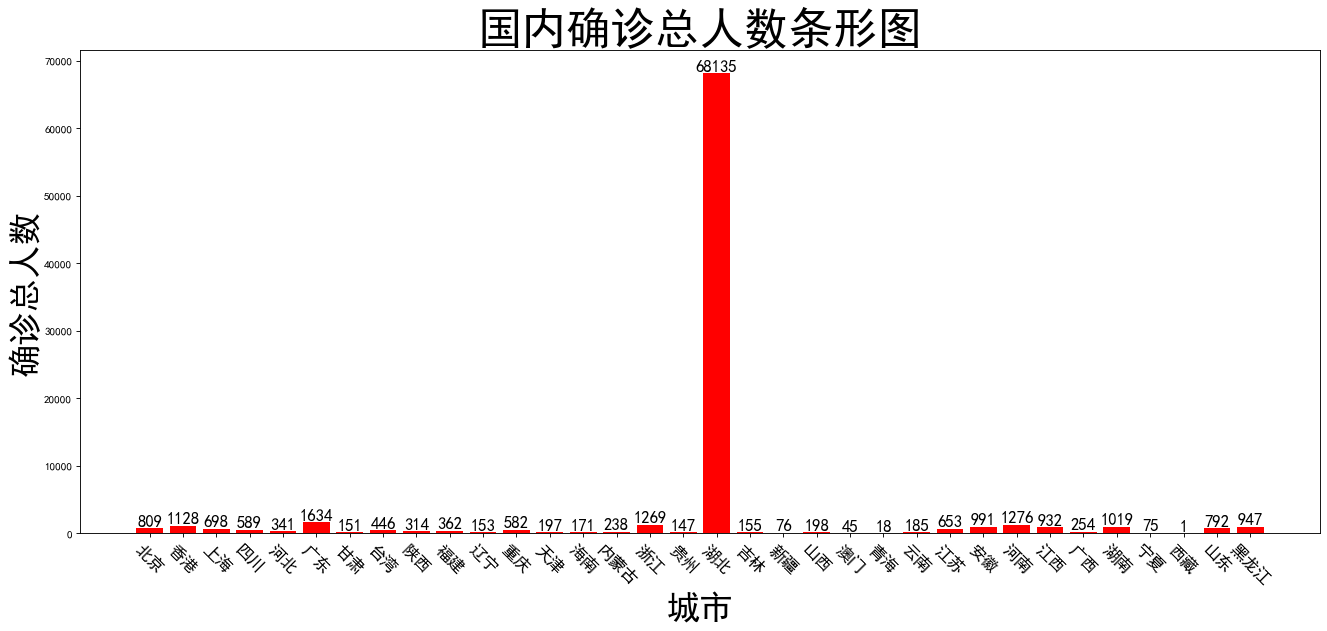

In [25]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.bar(city, values_comfirm_china, width = 0.8, color = 'red')
plt.xlabel("城市",size = 30)
plt.ylabel("确诊总人数", rotation = 90,size = 30)
plt.xticks(list(city), rotation = -45,size = 15)
plt.title('国内确诊总人数条形图',size = 40)
#plt.grid(alpha = 0.4)

for a, b in zip(city,values_comfirm_china):
    plt.text(a, b, b, ha='center', va='bottom', size=15)
plt.savefig('国内确诊及死亡总人数条形图.png')
plt.show()

此柱状图展示了国内各地自疫情爆发以来的累计确诊人数，武汉的累计确诊人数为68135，其他地区均在2000人以下。武汉是疫情爆发地，全国人民齐心抗疫，使病毒的扩散得到有效的控制。与国外的确诊人数相对比，国内的防疫工作迅速且有效。

#### 绘制国内现存确诊总人数条形图 

In [26]:
city = list(total_data_nowConfirm.keys())
#print(city)
values_nowcomfirm_china = list(total_data_nowConfirm.values())
#print(values_comfirm_china)

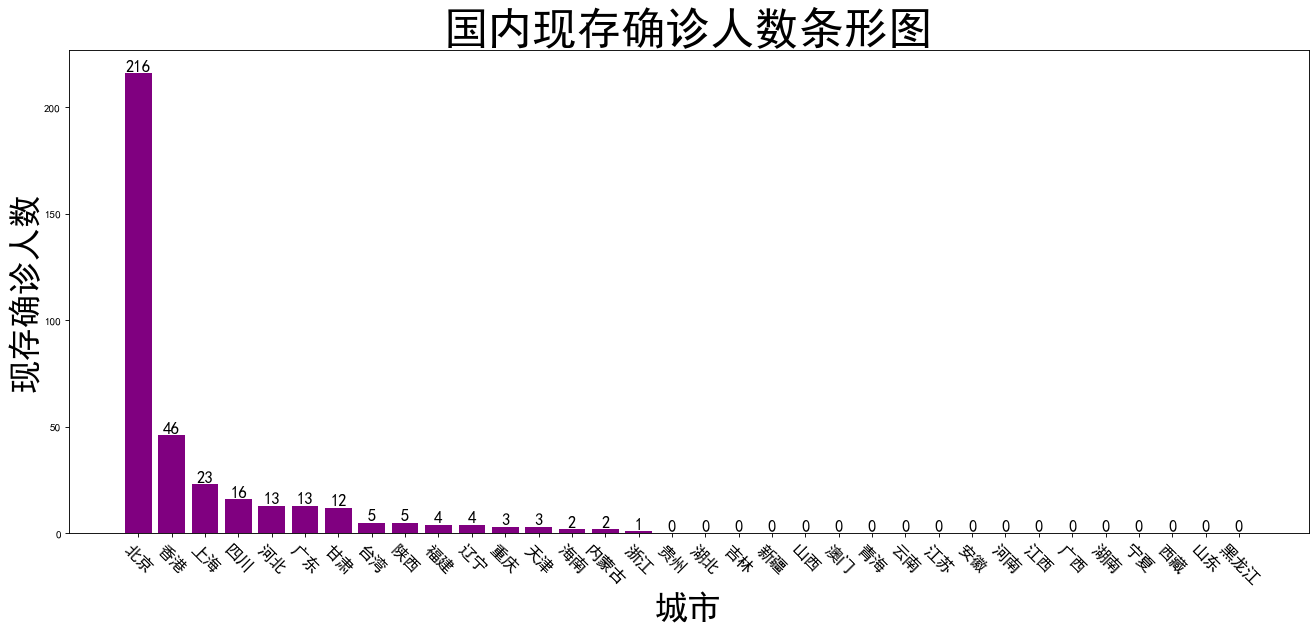

In [27]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.bar(city, values_nowcomfirm_china,width = 0.8, color = 'purple')
plt.xlabel("城市",size = 30)
plt.ylabel("现存确诊人数", rotation = 90,size = 30)
plt.xticks(list(city), rotation = -45,size = 15)
plt.title('国内现存确诊人数条形图',size = 40)

for a, b in zip(city,values_nowcomfirm_china):
    plt.text(a, b, b, ha='center', va='bottom', size=15)
plt.savefig('国内现存确诊总人数条形图.png')
plt.show()

下一步采取散点图，以确诊人数（新增确诊人数）为横坐标，以死亡人数（新增死亡人数）为纵坐标。通过比较不同国家的情况，能起到初步分类的效果，以便于下一步的数据分析

### 四、绘制死亡人数与确诊人数散点图——国内与国外（简单分类） <a name="paragraph4"></a>

##### 绘制国内当天新增确诊与新增死亡人数散点图 

In [28]:
#新增确诊
new_confirm_china_today = list(total_new_data.values())
#print(new_confirm_china_today)

#新增死亡
new_dead_china_today = list(new_dead_data.values())
#print(new_dead_china_today)

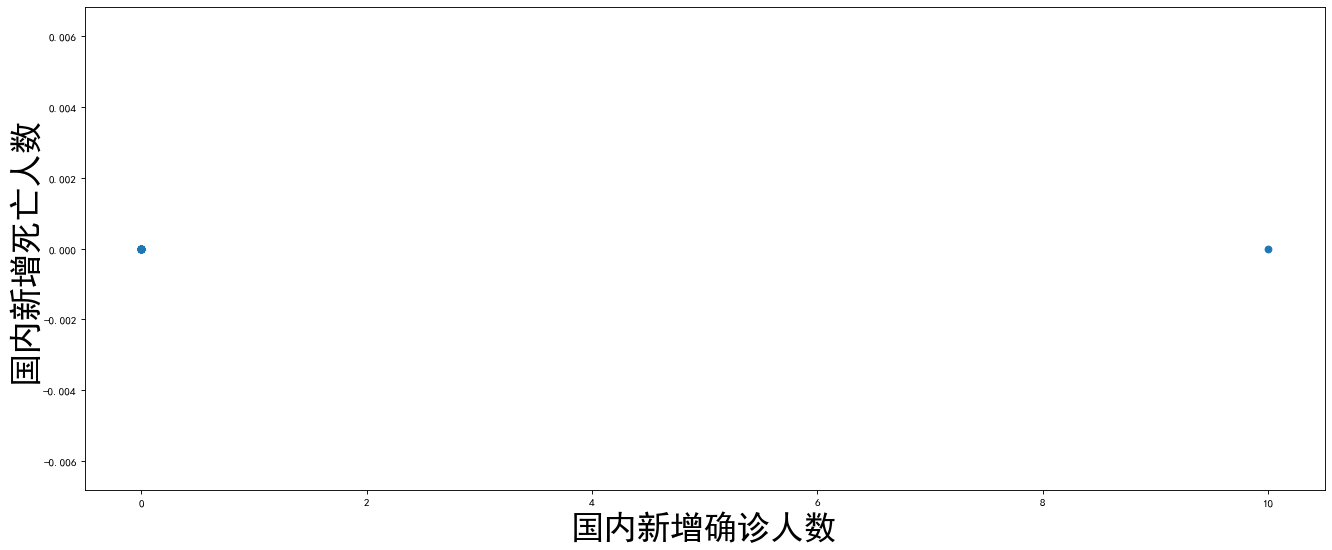

In [29]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.scatter(new_confirm_china_today,new_dead_china_today)
#添加描述信息
plt.xlabel("国内新增确诊人数",size = 30)
plt.ylabel("国内新增死亡人数", rotation = 90,size = 30)
plt.savefig('国内当天新增确诊与新增死亡人数散点图.png')
plt.show()

##### 绘制国外总死亡人数与确诊人数散点图

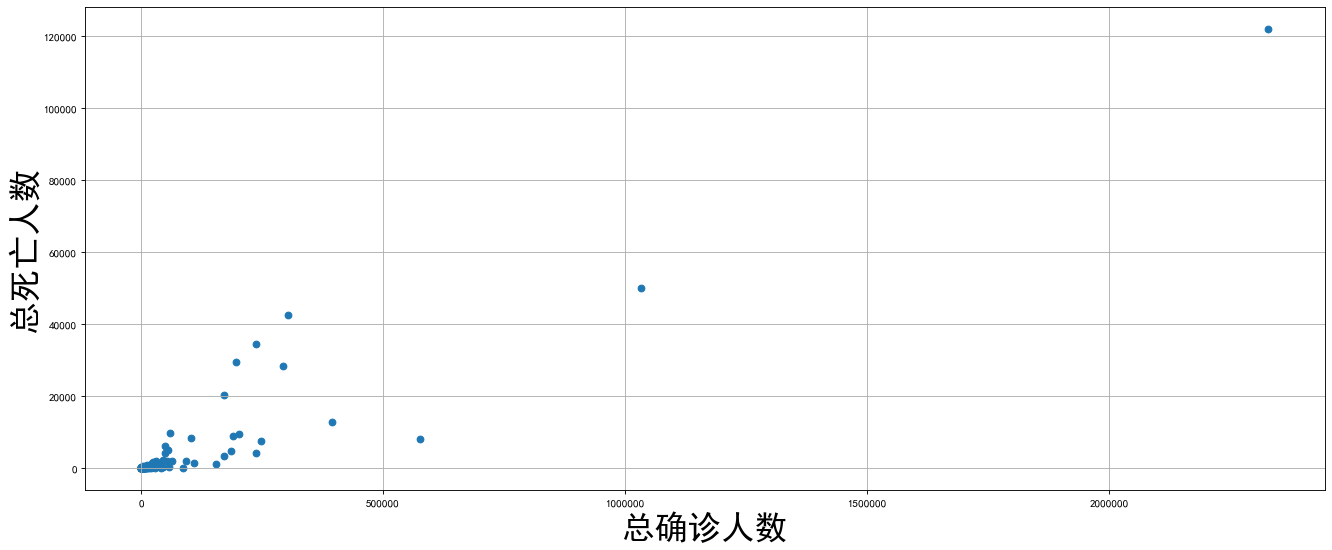

In [30]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.scatter(confirm,dead)
#添加描述信息
plt.xlabel("总确诊人数",size = 30)
plt.ylabel("总死亡人数", rotation = 90,size = 30)
plt.grid()
plt.savefig('国外总死亡人数与确诊人数散点图.png')

此散点图展示出国外国家大体可以分为三个区间：<p>1.确诊人数>2000000，死亡人数>120000<p>
2.确诊人数处于500000-1500000，死亡人数处于20000-60000<p>
3.确诊人数处于0-500000，死亡人数处于0-40000

##### 绘制国外新增死亡人数与新增确诊人数散点图

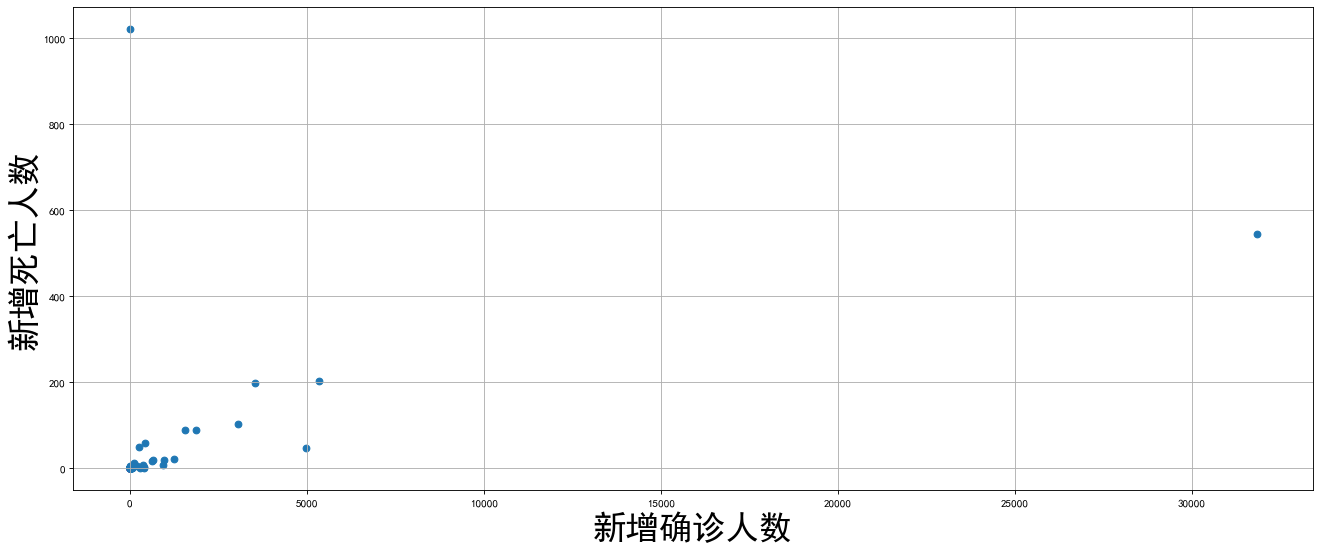

In [31]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.scatter(confirmAdd,deadCompare)
#添加描述信息
plt.xlabel("新增确诊人数",size = 30)
plt.ylabel("新增死亡人数", rotation = 90,size = 30)
plt.grid()
plt.savefig('国外新增死亡人数与新增确诊人数散点图.png')

“新增确诊人数与新增死亡人数”散点图所显示的疫情严重程度分类与“总确诊人数与总死亡人数”散点图的分类基本一致

通过上面柱状图、饼图、折线图以及散点图，我们对不同国家的疫情情况有了初步了解，下面对上面分析得出疫情严重的国家做更为详细的分析，并试图从中探寻一些数学规律。

### 五、绘制国外疫情较为严重的国家每日确诊、新增确诊和死亡人数曲线图<a name="paragraph5"></a>

In [32]:
# 1.目标网址
url = 'https://api.inews.qq.com/newsqa/v1/automation/modules/list?modules=FAutoCountryMerge'

# 2.请求资源，获取响应内容
resp = requests.post(url)
#print(resp.text)

# 3.提取数据
# 类型转换 json--->dict
data = json.loads(resp.text)
#print(data)

In [33]:
usa = data['data']['FAutoCountryMerge']['美国']['list']
#print(usa)

Brazil = data['data']['FAutoCountryMerge']['巴西']['list']
#print(Brazil)

Russia = data['data']['FAutoCountryMerge']['俄罗斯']['list']
#print(Russia)

Spain = data['data']['FAutoCountryMerge']['西班牙']['list']
#print(Spain)

UK = data['data']['FAutoCountryMerge']['英国']['list']
#print(UK)

Italy = data['data']['FAutoCountryMerge']['意大利']['list']
#print(Italy)

France = data['data']['FAutoCountryMerge']['法国']['list']
#print(France)

Germany = data['data']['FAutoCountryMerge']['德国']['list']
#print(Germany)

In [34]:
usa_date = [ usa[i]['date'] for i in range(len(usa))]
#print(usa_date)
usa_confirm = [ usa[i]['confirm'] for i in range(len(usa))]#确诊
#print(usa_confirm)
usa_confirm_add = [ usa[i]['confirm_add'] for i in range(len(usa))]#新增确诊
#print(usa_confirm_add)
usa_dead = [ usa[i]['dead'] for i in range(len(usa))]#死亡
#print(usa_dead)

Brazil_date = [ Brazil[i]['date'] for i in range(len(Brazil))]
#print(Brazil_date)
Brazil_confirm = [ Brazil[i]['confirm'] for i in range(len(Brazil)) ]#确诊
#print(Brazil_confirm)
Brazil_confirm_add = [ Brazil[i]['confirm_add'] for i in range(len(Brazil)) ]#新增确诊
#print(Brazil_confirm_add)
Brazil_dead = [ Brazil[i]['dead'] for i in range(len(Brazil)) ]#死亡
#print(Brazil_dead)#死亡

Russia_date = [ Russia[i]['date'] for i in range(len(Russia))]
#print(Russia_date)
Russia_confirm = [ Russia[i]['confirm'] for i in range(len(Russia))]#确诊
#print(Russia_confirm)
Russia_confirm_add = [ Russia[i]['confirm_add'] for i in range(len(Russia))]#新增确诊
#print(Russia_confirm_add)
Russia_dead = [ Russia[i]['dead'] for i in range(len(Russia))]#死亡
#print(Russia_dead)

Spain_date = [ Spain[i]['date'] for i in range(len(Spain))]
#print(Spain_date)
Spain_confirm = [ Spain[i]['confirm'] for i in range(len(Spain))]#确诊
#print(Spain_confirm)
Spain_confirm_add = [ Spain[i]['confirm_add'] for i in range(len(Spain))]#新增确诊
#print(Spain_confirm_add)
Spain_dead = [ Spain[i]['dead'] for i in range(len(Spain))]#死亡
#print(Spain_dead)

UK_date = [ UK[i]['date'] for i in range(len(UK))]
#print(UK_date)
UK_confirm = [ UK[i]['confirm'] for i in range(len(UK))]#确诊
#print(UK_confirm)
UK_confirm_add = [ UK[i]['confirm_add'] for i in range(len(UK))]#新增确诊
#print(UK_confirm_add)
UK_dead = [ UK[i]['dead'] for i in range(len(UK))]#死亡
#print(UK_dead)

Italy_date = [ Italy[i]['date'] for i in range(len(Italy))]
#print(Italy_date)
Italy_confirm = [ Italy[i]['confirm'] for i in range(len(Italy))]#确诊
#print(Italy_confirm)
Italy_confirm_add = [ Italy[i]['confirm_add'] for i in range(len(Italy))]#新增确诊
#print(Italy_confirm_add)
Italy_dead = [ Italy[i]['dead'] for i in range(len(Italy))]#死亡
#print(Italy_dead)

France_date = [ France[i]['date'] for i in range(len(France))]
#print(France_date)
France_confirm = [ France[i]['confirm'] for i in range(len(France))]#确诊
#print(France_confirm)
France_confirm_add = [ France[i]['confirm_add'] for i in range(len(France))]#新增确诊
#print(France_confirm_add)
France_dead = [ France[i]['dead'] for i in range(len(France))]#死亡
#print(France_dead)

Germany_date = [ Germany[i]['date'] for i in range(len(Germany))]
#print(Germany_date)
Germany_confirm = [ Germany[i]['confirm'] for i in range(len(Germany))]#确诊
#print(Germany_confirm)
Germany_confirm_add = [ Germany[i]['confirm_add'] for i in range(len(Germany))]#新增确诊
#print(Germany_confirm_add)
Germany_dead = [ Germany[i]['dead'] for i in range(len(Germany))]#死亡、
#print(Germany_dead)

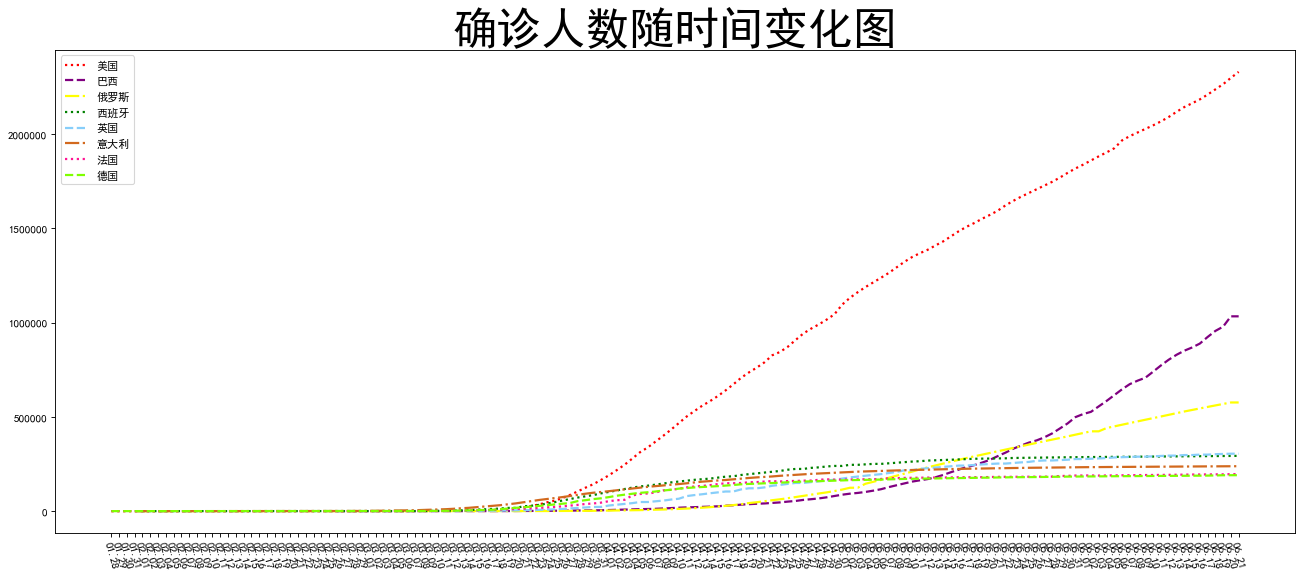

In [35]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.plot(usa_date, usa_confirm, color = 'red',label = '美国',linestyle = ':',linewidth = 2)
plt.plot(Brazil_date, Brazil_confirm, color = 'purple',label = '巴西',linestyle = '--',linewidth = 2)
plt.plot(Russia_date, Russia_confirm, color = 'yellow',label = '俄罗斯',linestyle = '-.',linewidth = 2)
plt.plot(Spain_date, Spain_confirm, color = 'green',label = '西班牙',linestyle = ':',linewidth = 2)
plt.plot(UK_date, UK_confirm, color = '#87CEFA',label = '英国',linestyle = '--',linewidth = 2)
plt.plot(Italy_date, Italy_confirm, color = '#D2691E',label = '意大利',linestyle = '-.',linewidth = 2)
plt.plot(France_date, France_confirm, color = '#FF1493',label = '法国',linestyle = ':',linewidth = 2)
plt.plot(Germany_date, Germany_confirm, color = '#7FFF00',label = '德国',linestyle = '--',linewidth = 2)
plt.xticks(list(usa_date), rotation = -75,size = 10)
plt.title('确诊人数随时间变化图',size = 40)
#plt.grid()
plt.legend()
plt.savefig('确诊人数随时间变化图.png')

从曲线图可以看出，美国、巴西及俄罗斯的确诊人数近期增长迅速，西班牙、英国、意大利、法国及德国的曲线相近，各个国家确诊数从三月中旬开始快速增长。

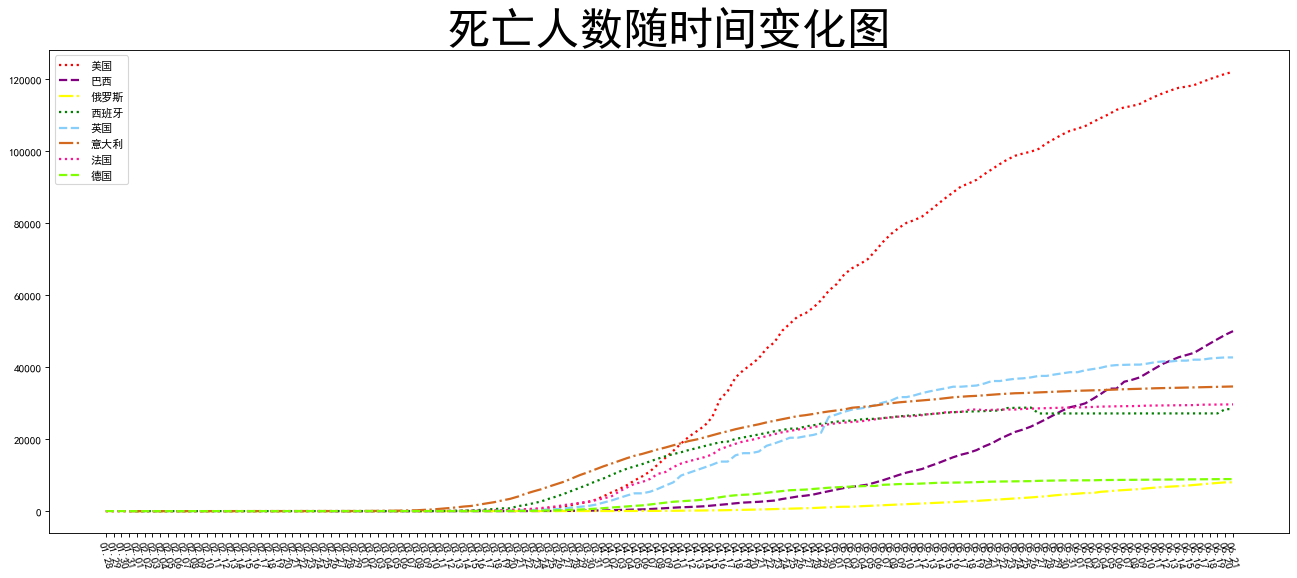

In [36]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.plot(usa_date, usa_dead, color = 'red',label = '美国',linestyle = ':',linewidth = 2)
plt.plot(Brazil_date, Brazil_dead, color = 'purple',label = '巴西',linestyle = '--',linewidth = 2)
plt.plot(Russia_date, Russia_dead, color = 'yellow',label = '俄罗斯',linestyle = '-.',linewidth = 2)
plt.plot(Spain_date, Spain_dead, color = 'green',label = '西班牙',linestyle = ':',linewidth = 2)
plt.plot(UK_date, UK_dead, color = '#87CEFA',label = '英国',linestyle = '--',linewidth = 2)
plt.plot(Italy_date, Italy_dead, color = '#D2691E',label = '意大利',linestyle = '-.',linewidth = 2)
plt.plot(France_date, France_dead, color = '#FF1493',label = '法国',linestyle = ':',linewidth = 2)
plt.plot(Germany_date, Germany_dead, color = '#7FFF00',label = '德国',linestyle = '--',linewidth = 2)
plt.xticks(list(usa_date), rotation = -75,size = 10)
plt.title('死亡人数随时间变化图',size = 40)
#plt.grid()
plt.legend()
plt.savefig('死亡人数随时间变化图.png')

各个国家死亡数从三月中旬开始快速增长

为了观察规律每日新增确诊数

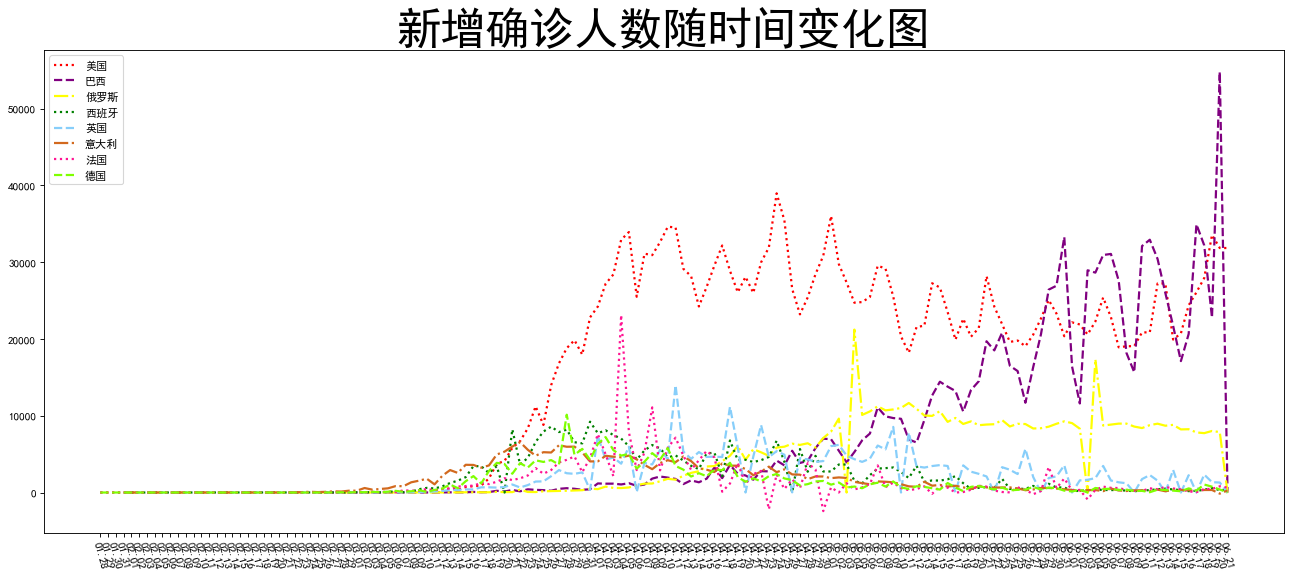

In [37]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.plot(usa_date, usa_confirm_add, color = 'red',label = '美国',linestyle = ':',linewidth = 2)
plt.plot(Brazil_date, Brazil_confirm_add, color = 'purple',label = '巴西',linestyle = '--',linewidth = 2)
plt.plot(Russia_date, Russia_confirm_add, color = 'yellow',label = '俄罗斯',linestyle = '-.',linewidth = 2)
plt.plot(Spain_date, Spain_confirm_add, color = 'green',label = '西班牙',linestyle = ':',linewidth = 2)
plt.plot(UK_date, UK_confirm_add, color = '#87CEFA',label = '英国',linestyle = '--',linewidth = 2)
plt.plot(Italy_date, Italy_confirm_add, color = '#D2691E',label = '意大利',linestyle = '-.',linewidth = 2)
plt.plot(France_date, France_confirm_add, color = '#FF1493',label = '法国',linestyle = ':',linewidth = 2)
plt.plot(Germany_date, Germany_confirm_add, color = '#7FFF00',label = '德国',linestyle = '--',linewidth = 2)
plt.xticks(list(usa_date), rotation = -75,size = 10)
plt.title('新增确诊人数随时间变化图',size = 40)
#plt.grid()
plt.legend()
plt.savefig('新增确诊人数随时间变化图.png')

美国每日新增确诊人数在三、四、五月份都很严重，俄罗斯和巴西在六月份很严重，其余国家在三、四月份增长迅速。

### 六、尝试挖掘疫情中的数学规律<a name="paragraph6"></a>

In [38]:
import numpy as np

In [39]:
usa_dead_array = np.array(usa_dead)
#print(usa_dead_array)
Brazil_dead_array = np.array(Brazil_dead)
#print(Brazil_dead_array)
Russia_dead_array = np.array(Russia_dead)
#print(Russia_dead_array)
Spain_dead_array = np.array(Spain_dead)
#print(Spain_dead_array)
UK_dead_array = np.array(UK_dead)
#print(UK_dead_array)
Italy_dead_array = np.array(Italy_dead)
#print(Italy_dead_array)
France_dead_array = np.array(France_dead)
#print(France_dead_array)
Germany_dead_array = np.array(Germany_dead)
#print(Germany_dead_array)

计算每个国家单日新增死亡人数

In [40]:
a = [usa_dead_array[i+1] - usa_dead_array[i] for i in range(len(usa_dead_array)-1)]
a.insert(0,0)
usa_dead_add = np.array(a)
#print(usa_dead_add)

b = [Brazil_dead_array[i+1] - Brazil_dead_array[i] for i in range(len(Brazil_dead_array)-1)]
b.insert(0,0)
Brazil_dead_add = np.array(b)
#print(Brazil_dead_add)

c = [Russia_dead_array[i+1] - Russia_dead_array[i] for i in range(len(Russia_dead_array)-1)]
c.insert(0,0)
Russia_dead_add = np.array(c)
#print(Russia_dead_add)

d = [Spain_dead_array[i+1] - Spain_dead_array[i] for i in range(len(Spain_dead_array)-1)]
d.insert(0,0)
Spain_dead_add = np.array(d)
#print(Spain_dead_add)

e = [UK_dead_array[i+1] - UK_dead_array[i] for i in range(len(UK_dead_array)-1)]
e.insert(0,0)
UK_dead_add = np.array(e)
#print(UK_dead_add)

f = [Italy_dead_array[i+1] - Italy_dead_array[i] for i in range(len(Italy_dead_array)-1)]
f.insert(0,0)
Italy_dead_add = np.array(f)
#print(Italy_dead_add)

g = [France_dead_array[i+1] - France_dead_array[i] for i in range(len(France_dead_array)-1)]
g.insert(0,0)
France_dead_add = np.array(g)
#print(France_dead_add)

h = [Germany_dead_array[i+1] - Germany_dead_array[i] for i in range(len(Germany_dead_array)-1)]
h.insert(0,0)
Germany_dead_add = np.array(h)
#print(Germany_dead_add)

绘制出各个国家的散点图：

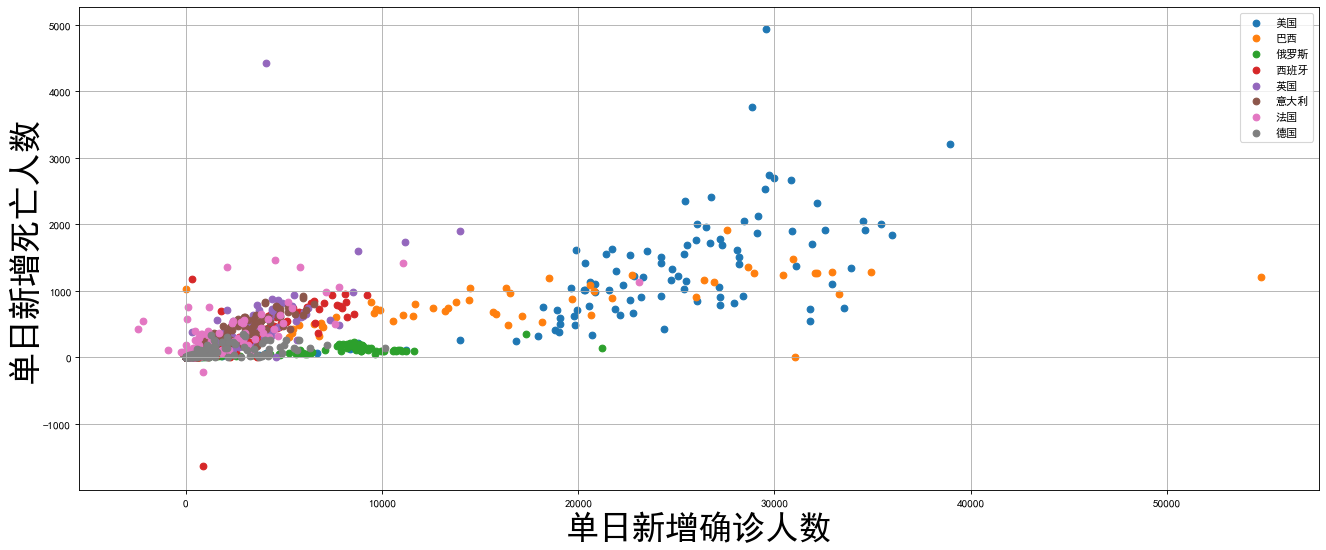

In [41]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.scatter(usa_confirm_add,usa_dead_add,label = '美国')
plt.scatter(Brazil_confirm_add,Brazil_dead_add,label = '巴西')
plt.scatter(Russia_confirm_add,Russia_dead_add,label = '俄罗斯')
plt.scatter(Spain_confirm_add,Spain_dead_add,label = '西班牙')
plt.scatter(UK_confirm_add,UK_dead_add,label = '英国')
plt.scatter(Italy_confirm_add,Italy_dead_add,label = '意大利')
plt.scatter(France_confirm_add,France_dead_add,label = '法国')
plt.scatter(Germany_confirm_add,Germany_dead_add,label = '德国')
#添加描述信息
plt.xlabel("单日新增确诊人数",size = 30)
plt.ylabel("单日新增死亡人数", rotation = 90,size = 30)
plt.legend()
plt.grid()
plt.savefig('各个国家的散点图.png')

为了寻找这些数据背后是否隐藏着某种数学规律，下面用直线对以上数据进行拟合

美国拟合式子为：  
0.05824 x - 80.53
巴西拟合式子为：  
0.03592 x + 110
俄罗斯拟合式子为：  
0.01358 x + 1.147
西班牙拟合式子为：  
0.1029 x - 19.18
英国拟合式子为：  
0.135 x + 5.73
意大利拟合式子为：  
0.1316 x + 21.58
法国拟合式子为：  
0.08117 x + 93.57
德国拟合式子为：  
0.02664 x + 25.92


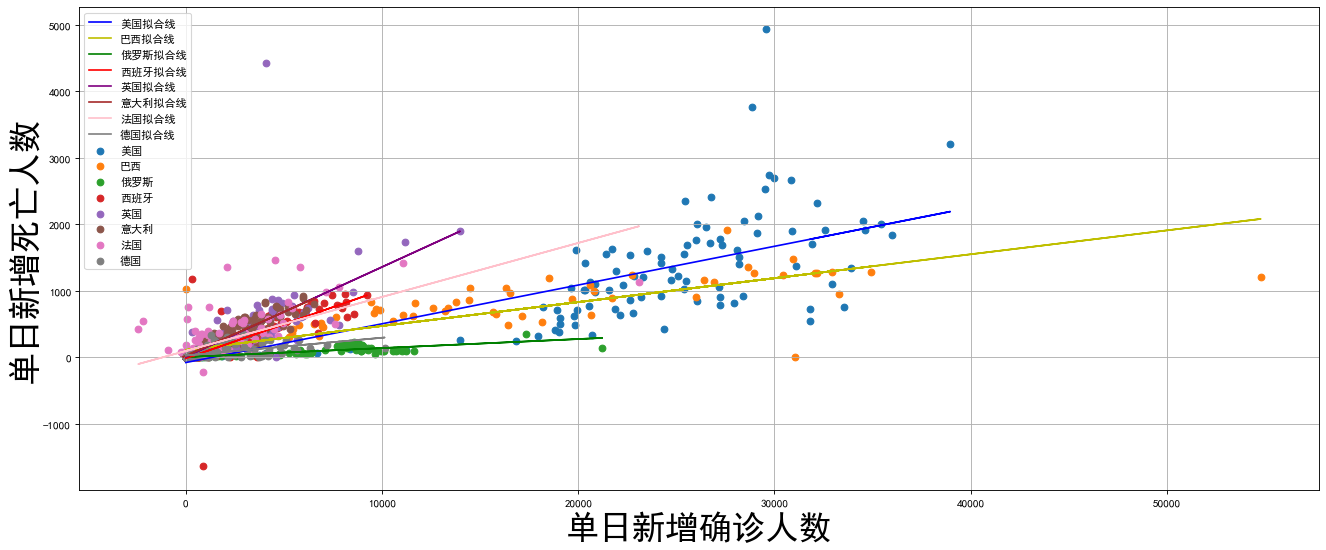

In [42]:
#美国
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
usa_fit = np.polyfit(usa_confirm_add, usa_dead_add, 1) # 用一次式拟合
p1 = np.poly1d(usa_fit)
print('美国拟合式子为：',p1) # 在屏幕上打印拟合多项式
usa_fit_values=p1(usa_confirm_add) 
plt.scatter(usa_confirm_add,usa_dead_add,label = '美国')
plt.plot(usa_confirm_add, usa_fit_values, 'b',label='美国拟合线')

#巴西
Brazil_fit = np.polyfit(Brazil_confirm_add, Brazil_dead_add, 1) # 用一次式拟合
p2 = np.poly1d(Brazil_fit)
print('巴西拟合式子为：',p2) # 在屏幕上打印拟合多项式
Brazil_fit_values=p2(Brazil_confirm_add)
plt.scatter(Brazil_confirm_add,Brazil_dead_add,label = '巴西')
plt.plot(Brazil_confirm_add, Brazil_fit_values, 'y',label='巴西拟合线')

#俄罗斯
Russia_fit = np.polyfit(Russia_confirm_add, Russia_dead_add, 1) # 用一次式拟合
p3 = np.poly1d(Russia_fit)
print('俄罗斯拟合式子为：',p3) # 在屏幕上打印拟合多项式
Russia_fit_values=p3(Russia_confirm_add)
plt.scatter(Russia_confirm_add,Russia_dead_add,label = '俄罗斯')
plt.plot(Russia_confirm_add, Russia_fit_values, 'g',label='俄罗斯拟合线')

#西班牙
Spain_fit = np.polyfit(Spain_confirm_add, Spain_dead_add, 1) # 用一次式拟合
p4 = np.poly1d(Spain_fit)
print('西班牙拟合式子为：',p4) # 在屏幕上打印拟合多项式
Spain_fit_values=p4(Spain_confirm_add)
plt.scatter(Spain_confirm_add,Spain_dead_add,label = '西班牙')
plt.plot(Spain_confirm_add, Spain_fit_values, 'r',label='西班牙拟合线')

#英国
UK_fit = np.polyfit(UK_confirm_add, UK_dead_add, 1) # 用一次式拟合
p5 = np.poly1d(UK_fit)
print('英国拟合式子为：',p5) # 在屏幕上打印拟合多项式
UK_fit_values=p5(UK_confirm_add)
plt.scatter(UK_confirm_add,UK_dead_add,label = '英国')
plt.plot(UK_confirm_add, UK_fit_values, 'purple',label='英国拟合线')

#意大利
Italy_fit = np.polyfit(Italy_confirm_add, Italy_dead_add, 1) # 用一次式拟合
p6 = np.poly1d(Italy_fit)
print('意大利拟合式子为：',p6) # 在屏幕上打印拟合多项式
Italy_fit_values=p6(Italy_confirm_add)
plt.scatter(Italy_confirm_add,Italy_dead_add,label = '意大利')
plt.plot(Italy_confirm_add, Italy_fit_values, 'brown',label='意大利拟合线')

#法国
France_fit = np.polyfit(France_confirm_add, France_dead_add, 1) # 用一次式拟合
p7 = np.poly1d(France_fit)
print('法国拟合式子为：',p7) # 在屏幕上打印拟合多项式
France_fit_values=p7(France_confirm_add)
plt.scatter(France_confirm_add,France_dead_add,label = '法国')
plt.plot(France_confirm_add, France_fit_values, 'pink',label='法国拟合线')

#德国
Germany_fit = np.polyfit(Germany_confirm_add, Germany_dead_add, 1) # 用一次式拟合
p8 = np.poly1d(Germany_fit)
print('德国拟合式子为：',p8) # 在屏幕上打印拟合多项式
Germany_fit_values=p8(Germany_confirm_add)
plt.scatter(Germany_confirm_add,Germany_dead_add,label = '德国')
plt.plot(Germany_confirm_add, Germany_fit_values, 'grey',label='德国拟合线')


#添加描述信息
plt.xlabel("单日新增确诊人数",size = 30)
plt.ylabel("单日新增死亡人数", rotation = 90,size = 30)
plt.legend()
plt.grid()
plt.savefig('各个国家的数据拟合.png')

下面我们试图从拟合曲线上找寻一下数学规律，美国、西班牙、英国、意大利和法国大部分国家的拟合曲线的斜率均在0.1附近，这说明此斜率或许是某个隐含的增长规律。我们对斜率求均值，得（0.05824+0.03592+0.01358+0.1029+0.135+0.1316+0.08117+0.02664）/8 =0.07313125≈0.1<p>此值可以在对疫情进行建模时作为限制条件，疫情的数据虽然受医疗卫生条件、政治、防疫措施是否及时等条件影响，但其内部一定有某种数学规律，通过在建模时引入此数值的限制，能使预测更能准确。

In [43]:
url_china = 'https://view.inews.qq.com/g2/getOnsInfo?name=wuwei_ww_cn_day_counts&callback=&_=%d'%int(time.time()*1000)
data_china = json.loads(requests.get(url=url_china).json()['data'])
data_china.sort(key=lambda x:x['date'])
    
date_list_china = list()       # 日期
confirm_list_china = list()    # 确诊
suspect_list_china = list()    # 疑似
dead_list_china = list()       # 死亡
heal_list_china = list()       # 治愈
for item in data_china:
    month, day = item['date'].split('/')
    date_list_china.append('%s.%s'%(month, day))
    confirm_list_china.append(int(item['confirm']))
    suspect_list_china.append(int(item['suspect']))
    dead_list_china.append(int(item['dead']))
    heal_list_china.append(int(item['heal']))   
#print(date_list)
#print(confirm_list)

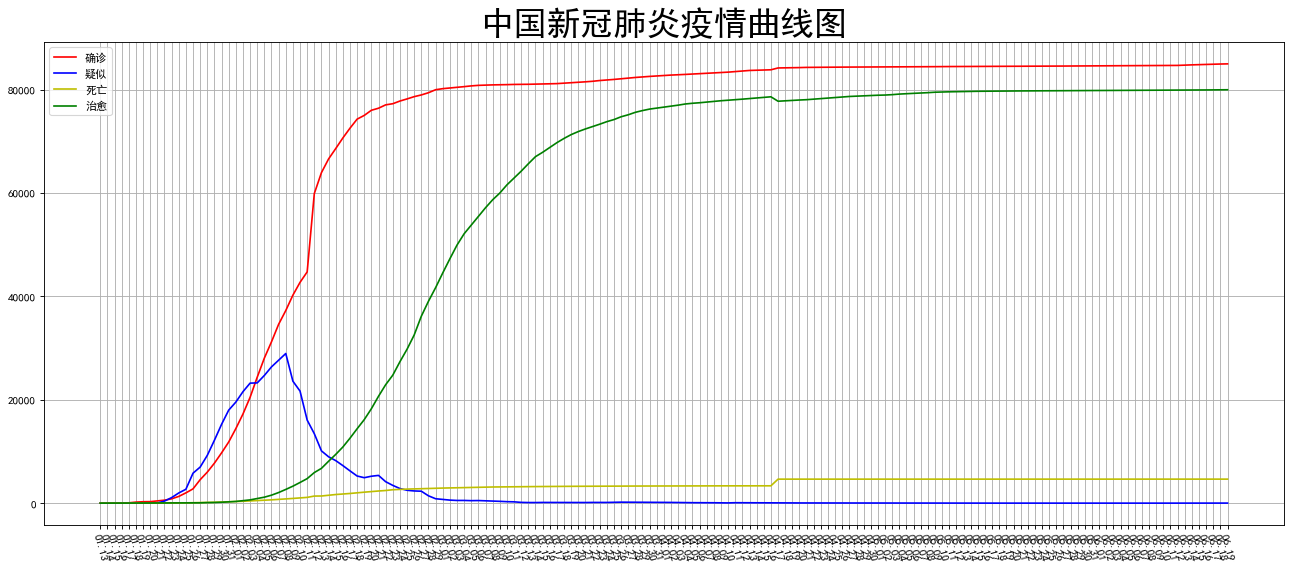

In [44]:
import matplotlib.dates as mdates
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.title('中国新冠肺炎疫情曲线图', fontsize=30)
plt.plot(date_list_china, confirm_list_china, 'r-', label='确诊')
plt.plot(date_list_china, suspect_list_china, 'b-',label='疑似')
plt.plot(date_list_china, dead_list_china, 'y-', label='死亡')
plt.plot(date_list_china, heal_list_china, 'g-', label='治愈')
plt.grid()
plt.legend() # 显示图例
plt.xticks(list(date_list_china), rotation = -75,size = 10)
plt.savefig('中国新冠肺炎疫情曲线图.png')
plt.show()

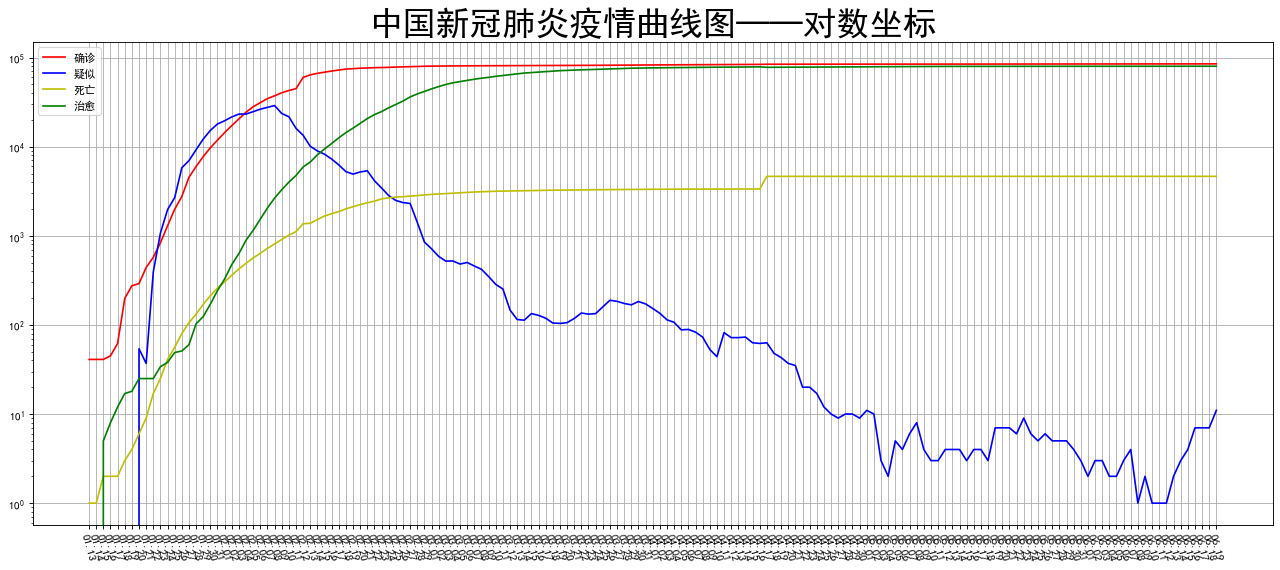

In [45]:
import matplotlib.dates as mdates
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.title('中国新冠肺炎疫情曲线图——对数坐标', fontsize=30)
plt.semilogy(date_list_china, confirm_list_china, 'r-', label='确诊')
plt.semilogy(date_list_china, suspect_list_china, 'b-',label='疑似')
plt.semilogy(date_list_china, dead_list_china, 'y-', label='死亡')
plt.semilogy(date_list_china, heal_list_china, 'g-', label='治愈')
plt.grid()
plt.legend() # 显示图例
plt.xticks(list(date_list_china), rotation = -75,size = 10)
plt.savefig('中国新冠肺炎疫情曲线图——对数坐标.png')
plt.show()

下面通过对数坐标，将国外各个国家与中国的确诊数据进行对比：

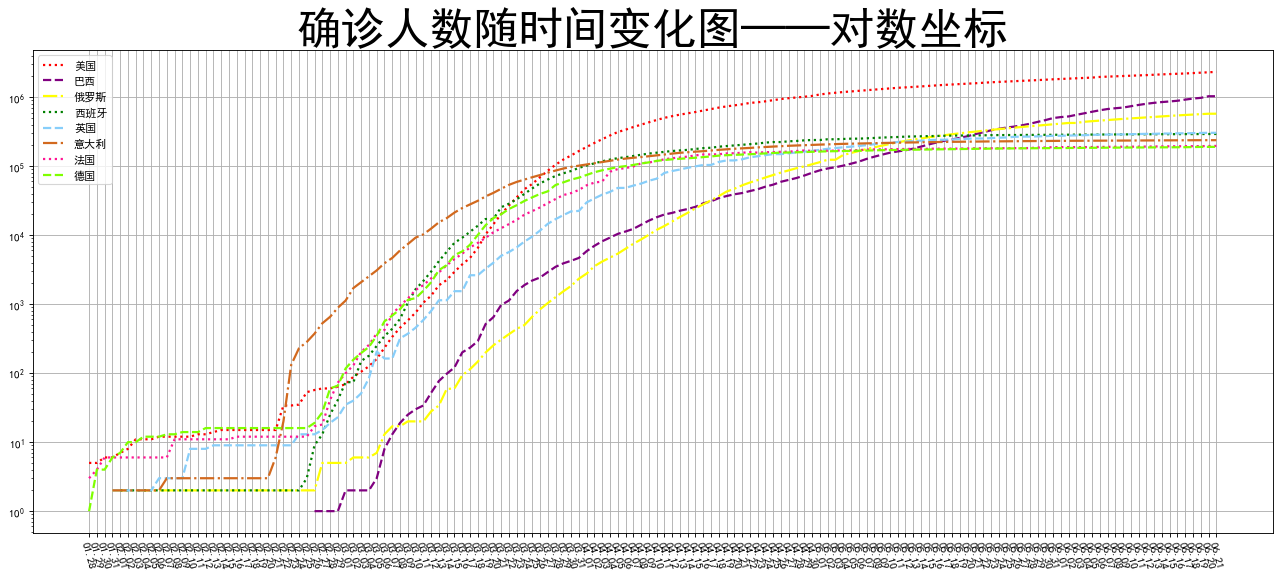

In [46]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.semilogy(usa_date, usa_confirm, color = 'red',label = '美国',linestyle = ':',linewidth = 2)
plt.semilogy(Brazil_date, Brazil_confirm, color = 'purple',label = '巴西',linestyle = '--',linewidth = 2)
plt.semilogy(Russia_date, Russia_confirm, color = 'yellow',label = '俄罗斯',linestyle = '-.',linewidth = 2)
plt.semilogy(Spain_date, Spain_confirm, color = 'green',label = '西班牙',linestyle = ':',linewidth = 2)
plt.semilogy(UK_date, UK_confirm, color = '#87CEFA',label = '英国',linestyle = '--',linewidth = 2)
plt.semilogy(Italy_date, Italy_confirm, color = '#D2691E',label = '意大利',linestyle = '-.',linewidth = 2)
plt.semilogy(France_date, France_confirm, color = '#FF1493',label = '法国',linestyle = ':',linewidth = 2)
plt.semilogy(Germany_date, Germany_confirm, color = '#7FFF00',label = '德国',linestyle = '--',linewidth = 2)
plt.xticks(list(usa_date), rotation = -75,size = 10)
plt.title('确诊人数随时间变化图——对数坐标',size = 40)
plt.grid()
plt.legend()
plt.savefig('确诊人数随时间变化图——对数坐标.png')

通过与中国确诊人数对数图比较，可以明显看到美国、俄罗斯和巴西的上升趋势明显，疫情形势依然严峻

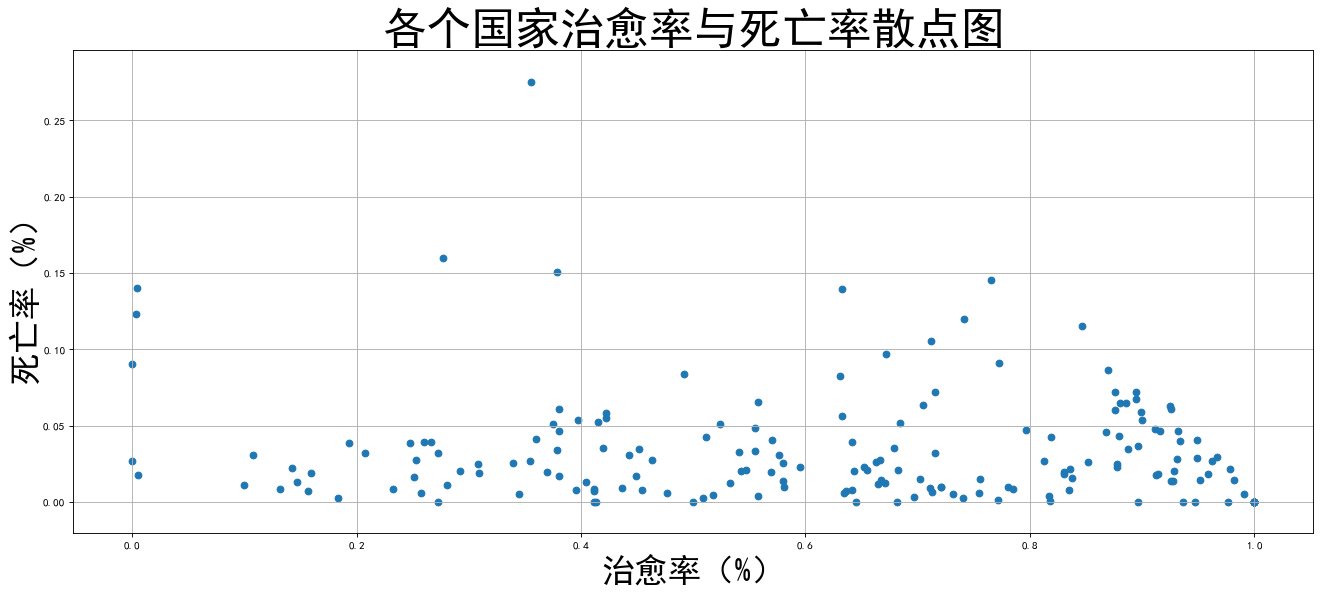

In [47]:
dead_rate = []
for i in range(len(confirm)):
    dead_rate.append(dead[i]/confirm[i])
#print(dead_rate)
heal_rate = []
for i in range(len(confirm)):
    heal_rate.append(heal[i]/confirm[i])
#print(heal_rate)
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.scatter(heal_rate,dead_rate)
#添加描述信息
plt.xlabel('治愈率（%）',size = 30)
plt.ylabel('死亡率（%）', rotation = 90,size = 30)
plt.title('各个国家治愈率与死亡率散点图',size = 40)
plt.grid()
plt.savefig('各个国家治愈率与死亡率散点图.png')

由上图可知，世界各国的总体死亡率在0~25%之间，但是治愈率有着很大差别。这与各国采取的防疫措施，医疗条件的差异有密切联系。

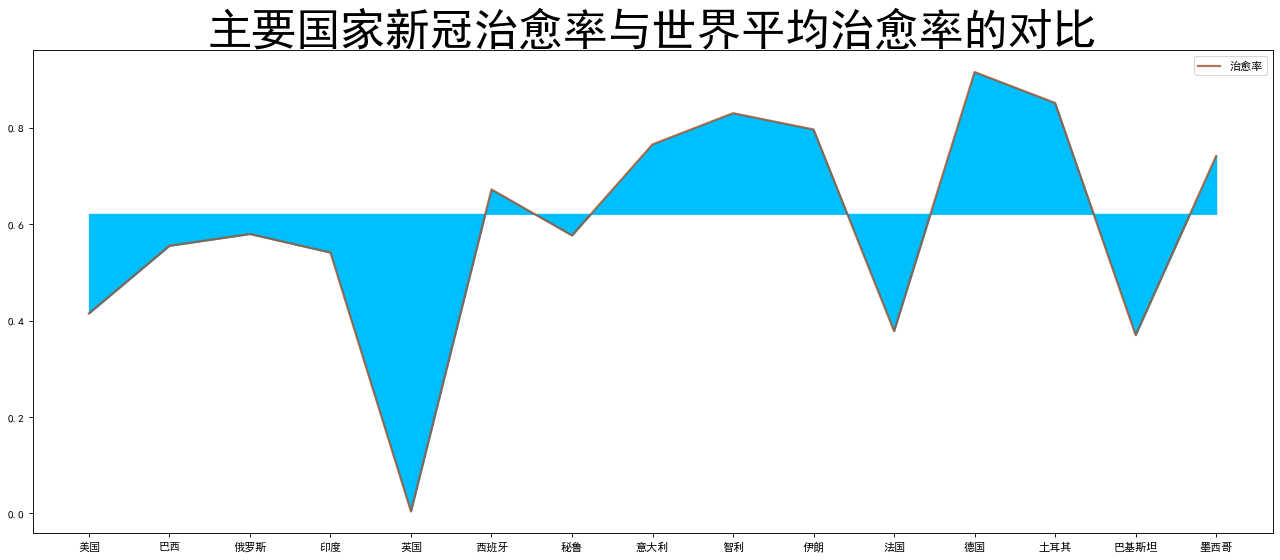

In [48]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.plot(name[0:15], heal_rate[0:15], color="#A0522D", alpha=0.8, label="治愈率", linewidth=2, linestyle="-")
# 绘制数据的均线，并进行颜色填充
curedRate_mean = mean(heal_rate)   # 计算全世界国家新冠治愈率的平均值
plt.fill_between(name[0:15], curedRate_mean, heal_rate[0:15], color="#00BFFF")    # 填充均值线于图线（参数y1和y2围成区域）之间围城的区域
plt.title("主要国家新冠治愈率与世界平均治愈率的对比", fontsize=40)
plt.legend()
plt.savefig('主要国家新冠治愈率与世界平均治愈率的对比.png')
plt.show()

从以上治愈率均线图可以看出，美国、巴西、俄罗斯、英国、印度、秘鲁、法国治愈率低于世界平均；而其他均高于世界平均治愈率。其中德国，伊朗，土耳其的治愈率位列前三。

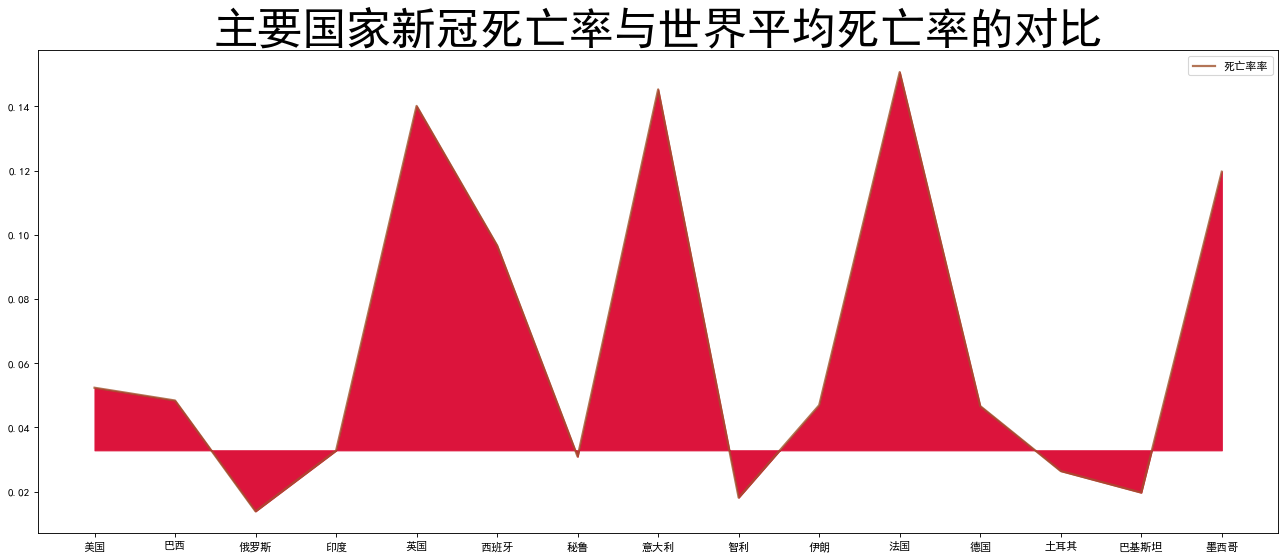

In [49]:
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
plt.plot(name[0:15], dead_rate[0:15], color="#A0522D", alpha=0.8, label="死亡率率", linewidth=2, linestyle="-")
# 绘制数据的均线，并进行颜色填充
deadRate_mean = mean(dead_rate)   # 计算全世界国家新冠死亡率的平均值
plt.fill_between(name[0:15], deadRate_mean, dead_rate[0:15], color="#DC143C")    # 填充均值线于图线（参数y1和y2围成区域）之间围城的区域
plt.title("主要国家新冠死亡率与世界平均死亡率的对比", fontsize=40)
plt.legend()
plt.savefig('主要国家新冠死亡率与世界平均死亡率的对比.png')
plt.show()

从以上治愈率均线图可以看出，俄罗斯、秘鲁、土耳其、智利、巴基斯坦死亡率低于世界平均；而其他均高于世界平均死亡率。其中法国、意大利、英国的死亡率位列前三。

下面对美国、巴西、俄罗斯和西班牙分别用多项式进行拟合，简单对疫情进行一下预测

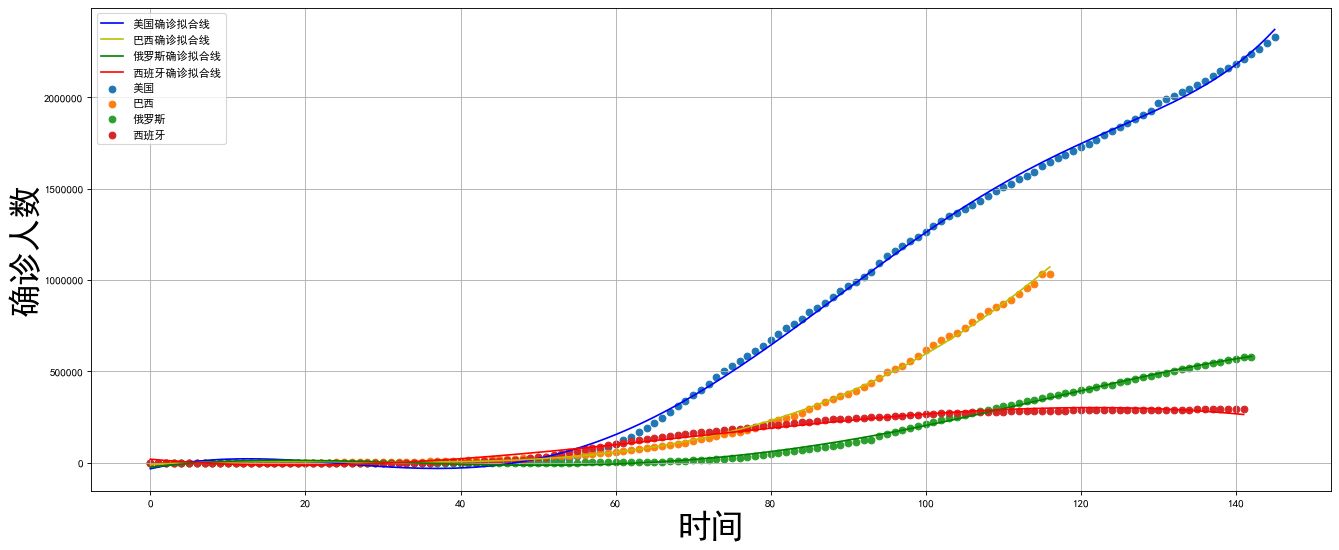

In [50]:
#美国
plt.figure(figsize = (20,8),dpi = 80) #设置图片尺寸
usa_days = [i for i in range(len(usa_date))]
usa_confirm_fit = np.polyfit(usa_days, usa_confirm, 6) # 用五次式拟合
confirm_p1 = np.poly1d(usa_confirm_fit)
usa_confirm_fit_values=confirm_p1(usa_days) 
plt.scatter(usa_days,usa_confirm,label = '美国')
plt.plot(usa_days, usa_confirm_fit_values, 'b',label='美国确诊拟合线')

#巴西
Brazil_days = [i for i in range(len(Brazil_date))]
Brazil_confirm_fit = np.polyfit(Brazil_days, Brazil_confirm, 3) # 用三次式拟合
confirm_p2 = np.poly1d(Brazil_confirm_fit)
Brazil_confirm_fit_values=confirm_p2(Brazil_days)
plt.scatter(Brazil_days,Brazil_confirm,label = '巴西')
plt.plot(Brazil_days, Brazil_confirm_fit_values, 'y',label='巴西确诊拟合线')

#俄罗斯
Russia_days = [i for i in range(len(Russia_date))]
Russia_confirm_fit = np.polyfit(Russia_days, Russia_confirm, 4) # 用四次式拟合
confirm_p3 = np.poly1d(Russia_confirm_fit)
Russia_confirm_fit_values=confirm_p3(Russia_days)
plt.scatter(Russia_days,Russia_confirm,label = '俄罗斯')
plt.plot(Russia_days, Russia_confirm_fit_values, 'g',label='俄罗斯确诊拟合线')

#西班牙
Spain_days = [i for i in range(len(Spain_date))]
Spain_confirm_fit = np.polyfit(Spain_days, Spain_confirm, 3) # 用三次式拟合
confirm_p4 = np.poly1d(Spain_confirm_fit)
Spain_confirm_fit_values=confirm_p4(Spain_days)
plt.scatter(Spain_days,Spain_confirm,label = '西班牙')
plt.plot(Spain_days, Spain_confirm_fit_values, 'r',label='西班牙确诊拟合线')

#添加描述信息
plt.xlabel("时间",size = 30)
plt.ylabel("确诊人数", rotation = 90,size = 30)
plt.legend()
plt.grid()
plt.savefig('美国、巴西、俄罗斯、西班牙疫情预测.png')

经试验，美国的数据用6阶多项式模型效果较好，巴西的数据用3阶多项式模型较好，俄罗斯的数据用4阶多项式的效果较好，西班牙的数据用3阶多项式的效果较好。由于传染病模型一般与指数增长有关，多项式模型只能在一定的范围内进行简单预测，我们可以通过这些曲线简单判断下一步的疫情趋势.并且3阶多项式函数自身带来后期的下降行为，因而此预测模型只能做简单参考作用。